# Imports

In [28]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
%matplotlib inline

# 1. Data preprocessing

In [3]:
df = pd.read_csv('./data/insurance2.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [5]:
X = df.iloc[:, 0:7].values
y = df['insuranceclaim'].values

## Data split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 2. Classifear

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')

In [8]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

## Max depth value

In [9]:
scores_data = pd.DataFrame()

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

max_depth_value = range(1, 15)

for max_depth in max_depth_value:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})

    scores_data = scores_data.append(temp_score_data)

/tmp/ipykernel_904501/2897158443.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
/tmp/ipykernel_904501/2897158443.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
/tmp/ipykernel_904501/2897158443.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
/tmp/ipykernel_904501/2897158443.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
/tmp/ipykernel_904501/2897158443.py:18: FutureWarning: The frame.append method is deprecated and wil

In [11]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.729907,0.690299,0.729907
0,2,0.760748,0.776119,0.752336
0,3,0.845794,0.861940,0.841121
0,4,0.874766,0.869403,0.872897
0,5,0.910280,0.876866,0.899065


In [12]:
long_scores_data = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='type', value_name='score')

In [13]:
long_scores_data

,max_depth,type,score
0,1,train_score,0.729907
1,2,train_score,0.760748
2,3,train_score,0.845794
3,4,train_score,0.874766
4,5,train_score,0.910280
5,6,train_score,0.941121
6,7,train_score,0.961682
7,8,train_score,0.985981
8,9,train_score,1.000000
9,10,train_score,1.000000


## Cross validation

<AxesSubplot:xlabel='max_depth', ylabel='score'>

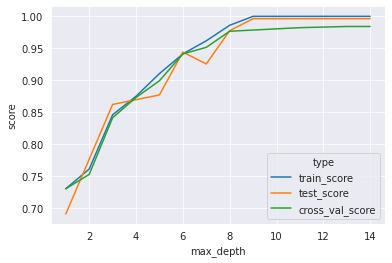

In [14]:
import seaborn as sns
sns.lineplot(x='max_depth', y='score', data=long_scores_data, hue='type')

## Accuracy score

In [27]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.996268656716418

# 3. Predict

In [15]:
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [16]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [17]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.8694619147449336

In [24]:
print(best_clf.predict([[18, 1, 18.5, 0, 1, 2, 10000]]))

[1]


# 4. Vizualization decision tree

[Text(0.5505952380952381, 0.95, 'X[4] <= 0.5\nentropy = 0.995\nsamples = 268\nvalue = [123, 145]'),
 Text(0.24404761904761904, 0.85, 'X[2] <= 25.49\nentropy = 0.988\nsamples = 213\nvalue = [120, 93]'),
 Text(0.09523809523809523, 0.75, 'X[2] <= 17.67\nentropy = 0.258\nsamples = 46\nvalue = [44, 2]'),
 Text(0.047619047619047616, 0.65, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.14285714285714285, 0.65, 'entropy = 0.0\nsamples = 44\nvalue = [44, 0]'),
 Text(0.39285714285714285, 0.75, 'X[3] <= 0.5\nentropy = 0.994\nsamples = 167\nvalue = [76, 91]'),
 Text(0.23809523809523808, 0.65, 'X[2] <= 25.983\nentropy = 0.349\nsamples = 61\nvalue = [4, 57]'),
 Text(0.19047619047619047, 0.55, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2857142857142857, 0.55, 'entropy = 0.0\nsamples = 57\nvalue = [0, 57]'),
 Text(0.5476190476190477, 0.65, 'X[0] <= 41.5\nentropy = 0.905\nsamples = 106\nvalue = [72, 34]'),
 Text(0.38095238095238093, 0.55, 'X[2] <= 31.208\nentropy = 0.579\nsamples = 

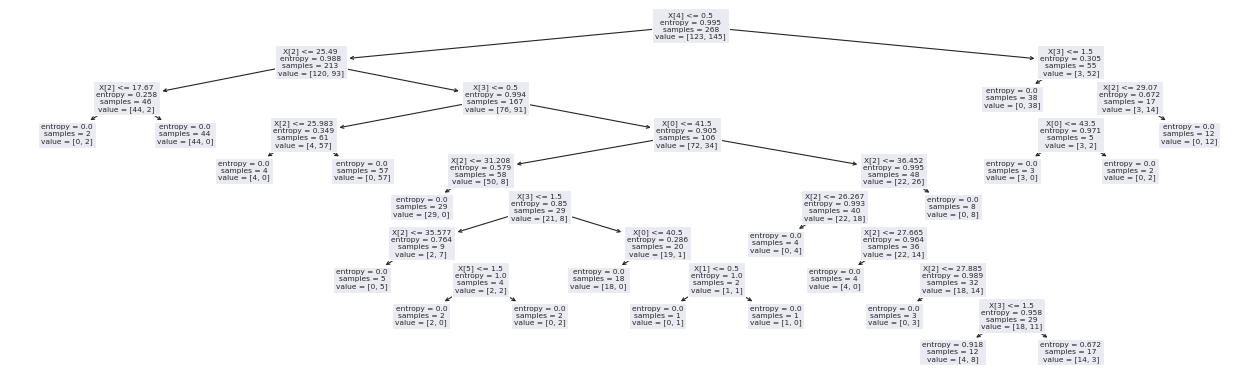

In [30]:
from sklearn.tree import plot_tree
figure(num=None, figsize=(20, 6), dpi=80)
plot_tree(best_clf.fit(X_test, y_test))